In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepn/Sample.csv
/kaggle/input/deepn/Train_Data.csv
/kaggle/input/deepn/Test_Data.csv


In [4]:
train = pd.read_csv('../input/deepn/Train_Data.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Identity               4061 non-null   int64  
 1   text                   4061 non-null   object 
 2   header                 4061 non-null   object 
 3   type_of_tweet          4061 non-null   object 
 4   screen_and_username    4061 non-null   object 
 5   num_followers          4061 non-null   object 
 6   num_friends            4061 non-null   object 
 7   num_retweets           4061 non-null   object 
 8   tweet_language         4061 non-null   object 
 9   rumour_identification  4061 non-null   object 
 10  Unnamed: 10            144 non-null    object 
 11  Unnamed: 11            14 non-null     object 
 12  Unnamed: 12            3 non-null      float64
dtypes: float64(1), int64(1), object(11)
memory usage: 412.6+ KB


In [6]:
train.head()

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2617,Statement from St. Louis County Police Officer...,ferguson,1,Alex Heuer/alexheuer,1571,1463,465,en,1,NaN,NaN,NaN
1,5075,Australian radio reporting that #SydneySiege g...,sydneysiege,1,Jack Moore/JFXM,17860,6864,175,en,0,NaN,NaN,NaN
2,1293,#CharlieHebdo: Hundreds of Muslims gather outs...,charliehebdo,1,AFP Photo Department/AFPphoto,36919,242,815,en,1,NaN,NaN,NaN
3,5251,Authorities have confirmed that #sydneysiege i...,sydneysiege,1,Yahoo UK News/YahooNewsUK,36137,926,117,en,1,NaN,NaN,NaN
4,4850,#BREAKING One man has been arrested and people...,sydneysiege,1,ABC News 24/ABCNews24,169840,1421,264,en,0,NaN,NaN,NaN


In [55]:
k = 0
def shift1(x):
    if(x[9] == 'en'):
       print(1) 
       x = x.shift(periods=-1)
    return x
       

In [56]:
test = train.apply(shift1)

1


In [54]:
test['rumour_identification'].value_counts()

1       2604
0       1313
en       130
8623       1
154        1
426        1
370        1
312        1
142        1
717        1
139        1
127        1
226        1
123        1
314        1
146        1
134        1
Name: rumour_identification, dtype: int64

In [64]:
test1 = train[train['rumour_identification'] == 'en'].shift(periods=-1,axis = 1)
idxx = train[train['rumour_identification'] == 'en']['Identity']
test1['text'] = test1['Identity'] + test1['text']
test1['Identity'] = idxx

In [65]:
test1

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
46,1024,Yes this is about victims. It's also about how...,charliehebdo,1,Maajid Nawaz/MaajidNawaz,33230,363,120,en,1,NaN,NaN,NaN
68,5439,#Coquitlam crews are on Sydney Ave after a mal...,sydneysiege,1,ScanBC/ScanBC,72226,666,211,en,1,NaN,NaN,NaN
81,1225,One of the most compelling &amp relevant thing...,charliehebdo,1,Ryan Rampling/RyanRampling,2284,2071,287,en,1,NaN,NaN,NaN
117,2366,Brutal treatment of black ppl isn’t indeed the...,ferguson,1,Khamenei.ir/khamenei_ir,69710,3,223,en,1,NaN,NaN,NaN
137,180,Hostage-taker at Paris grocery is suspect in f...,charliehebdo,1,Breaking News/BreakingNews,7198067,509,296,en,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,337,Report: Hostages taken at a printing shop nort...,charliehebdo,1,Breaking News/BreakingNews,7197412,509,272,en,0,NaN,NaN,NaN
3992,1021,I'm not #CharlieHebdo &amp neither are the Fre...,charliehebdo,1,Shuja Rabbani/ShujaRabbani,138235,1980,1157,en,1,NaN,NaN,NaN
3999,4014,Watch live: CBC NN coverage of shooting of sol...,ottawashooting,1,CBC News Alerts/CBCAlerts,365767,264,394,en,0,NaN,NaN,NaN
4033,2904,If u r white &amp u r not outraged about #Ferg...,ferguson,1,Muriel B/QuiltingMuriel,49956,5300,134,en,1,NaN,NaN,NaN


In [80]:
test2 = train[train['Unnamed: 10'] == 'en'].shift(periods=-2,axis = 1)
idxx = train[train['Unnamed: 10'] == 'en']['Identity']
textxx = train[train['Unnamed: 10'] == 'en']['text']
test2['text'] = textxx + test2['Identity'] + test2['text']
test2['Identity'] = idxx

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
94,3875,Police in pursuit of multiple shooters in Ottawa,PM safe,downtown buildings in lockdown http://t.co/3F...,ottawashooting,1,The Globe and Mail/globeandmail,534910,409,426,en,0,NaN
569,2807,#Ferguson PD doesn't have 70+ SWAT officers &amp,3 APC's. This has to a county wide response. ...,the governor are culpable.,ferguson,1,Mikki Kendall/Karnythia,23764,790,139,en,1,NaN
1029,948,#CharlieHebdo: Nothing can justify attack &amp,those who organised &amp,committed these crimes should be brought to j...,charliehebdo,1,Human Rights Watch/hrw,1589499,7580,717,en,1,NaN
1340,1885,Condolences to staff at Charlie Hebdo &amp,their loved ones. They stood for free speech ...,paid with their lives. I stand with #Charlie...,charliehebdo,1,Peter Tatchell/PeterTatchell,52132,1605,142,en,1,NaN
1440,3861,DEVELOPING: Police: Shooting near Canadian Par...,soldier wounded,active situation: http://t.co/9MAAywtu03 http...,ottawashooting,1,ABC News/ABC,3631105,860,146,en,0,NaN
2166,4414,Americans should watch Canadian coverage of #O...,you'll quickly realize what a pathetic sh*tsh...,media have become,ottawashooting,1,John Schindler/20committee,16970,847,154,en,1,NaN
2658,4135,My thoughts &amp,prayers are with the family &amp,friends of the soldier killed today in the li...,ottawashooting,1,Lois Brown /MPLoisBrown,4369,1040,123,en,0,NaN
3059,5137,We are calling on all to #PrayForHostages &amp,that Australia will not be hostage to fear &amp,hate. #sydneysiege http://t.co/qAzNfZIUWA,sydneysiege,1,Common Grace/CommonGraceAus,433,38,312,en,1,NaN
3182,2590,Beautiful statement from Palestinians expressi...,solidarity w/ #MikeBrown &amp,ppl of #Ferguson http://t.co/cnL7n2tc28 via @...,ferguson,1,Rania Khalek/RaniaKhalek,48082,1148,134,en,1,NaN
3709,2733,call weeping neighbors a mob --&gt,paint a picture of a violent community #MikeB...,justify his execution #Ferguson,ferguson,1,mf womb/dopegirlfresh,5486,1491,226,en,1,NaN


In [81]:
test2.iloc[0][1]

'Police in pursuit of multiple shooters in Ottawa PM safe downtown buildings in lockdown http://t.co/3FCWaFPA4y http://t.co/Si3yY0BRRd'

In [87]:
test3 = train[train['Unnamed: 11'] == 'en'].shift(periods=-3,axis=1)
idxx = train[train['Unnamed: 11'] == 'en']['Identity']
textxx = train[train['Unnamed: 11'] == 'en']['text']
headxx = train[train['Unnamed: 11'] == 'en']['header']
test3['text'] = textxx+headxx + test3['Identity'] + test3['text']
test3['Identity'] = idxx

In [85]:
train[train['Unnamed: 11'] == 'en']

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
412,1401,The only way Global Media can pay respect to #...,again &amp,again &amp,again....,charliehebdo,1,Yashwant Deshmukh/cvoter,38237,370,414,en,1.0
797,2789,Tell Congress to demilitarize local police dep...,&gt,&gt,http://t.co/HhTrkPtXwx #Ferguson http://t.co/...,ferguson,1,RH Reality Check/rhrealitycheck,28588,8623,159,en,1.0
3846,4496,This is our Home True North Strong &amp,Free - thoughts &amp,prayers to the people of Ottawa &amp,all of Canada #OttawaStrong http://t.co/rSueZ...,ottawashooting,1,The Canadian/Canadagentleman,11986,314,201,en,1.0


In [88]:
test3

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
412,1401,The only way Global Media can pay respect to #...,charliehebdo,1,Yashwant Deshmukh/cvoter,38237,370,414,en,1.0,NaN,NaN,NaN
797,2789,Tell Congress to demilitarize local police dep...,ferguson,1,RH Reality Check/rhrealitycheck,28588,8623,159,en,1.0,NaN,NaN,NaN
3846,4496,This is our Home True North Strong &amp Free -...,ottawashooting,1,The Canadian/Canadagentleman,11986,314,201,en,1.0,NaN,NaN,NaN


In [89]:
test2

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
94,3875,Police in pursuit of multiple shooters in Otta...,ottawashooting,1,The Globe and Mail/globeandmail,534910,409,426,en,0,NaN,NaN,NaN
569,2807,#Ferguson PD doesn't have 70+ SWAT officers &a...,ferguson,1,Mikki Kendall/Karnythia,23764,790,139,en,1,NaN,NaN,NaN
1029,948,#CharlieHebdo: Nothing can justify attack &amp...,charliehebdo,1,Human Rights Watch/hrw,1589499,7580,717,en,1,NaN,NaN,NaN
1340,1885,Condolences to staff at Charlie Hebdo &amp the...,charliehebdo,1,Peter Tatchell/PeterTatchell,52132,1605,142,en,1,NaN,NaN,NaN
1440,3861,DEVELOPING: Police: Shooting near Canadian Par...,ottawashooting,1,ABC News/ABC,3631105,860,146,en,0,NaN,NaN,NaN
2166,4414,Americans should watch Canadian coverage of #O...,ottawashooting,1,John Schindler/20committee,16970,847,154,en,1,NaN,NaN,NaN
2658,4135,My thoughts &amp prayers are with the family &...,ottawashooting,1,Lois Brown /MPLoisBrown,4369,1040,123,en,0,NaN,NaN,NaN
3059,5137,We are calling on all to #PrayForHostages &amp...,sydneysiege,1,Common Grace/CommonGraceAus,433,38,312,en,1,NaN,NaN,NaN
3182,2590,Beautiful statement from Palestinians expressi...,ferguson,1,Rania Khalek/RaniaKhalek,48082,1148,134,en,1,NaN,NaN,NaN
3709,2733,call weeping neighbors a mob --&gt paint a pic...,ferguson,1,mf womb/dopegirlfresh,5486,1491,226,en,1,NaN,NaN,NaN


In [90]:
test1

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
46,1024,Yes this is about victims. It's also about how...,charliehebdo,1,Maajid Nawaz/MaajidNawaz,33230,363,120,en,1,NaN,NaN,NaN
68,5439,#Coquitlam crews are on Sydney Ave after a mal...,sydneysiege,1,ScanBC/ScanBC,72226,666,211,en,1,NaN,NaN,NaN
81,1225,One of the most compelling &amp relevant thing...,charliehebdo,1,Ryan Rampling/RyanRampling,2284,2071,287,en,1,NaN,NaN,NaN
117,2366,Brutal treatment of black ppl isn’t indeed the...,ferguson,1,Khamenei.ir/khamenei_ir,69710,3,223,en,1,NaN,NaN,NaN
137,180,Hostage-taker at Paris grocery is suspect in f...,charliehebdo,1,Breaking News/BreakingNews,7198067,509,296,en,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,337,Report: Hostages taken at a printing shop nort...,charliehebdo,1,Breaking News/BreakingNews,7197412,509,272,en,0,NaN,NaN,NaN
3992,1021,I'm not #CharlieHebdo &amp neither are the Fre...,charliehebdo,1,Shuja Rabbani/ShujaRabbani,138235,1980,1157,en,1,NaN,NaN,NaN
3999,4014,Watch live: CBC NN coverage of shooting of sol...,ottawashooting,1,CBC News Alerts/CBCAlerts,365767,264,394,en,0,NaN,NaN,NaN
4033,2904,If u r white &amp u r not outraged about #Ferg...,ferguson,1,Muriel B/QuiltingMuriel,49956,5300,134,en,1,NaN,NaN,NaN


In [92]:
test = pd.concat([test1,test2,test3])
test

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
46,1024,Yes this is about victims. It's also about how...,charliehebdo,1,Maajid Nawaz/MaajidNawaz,33230,363,120,en,1,NaN,NaN,NaN
68,5439,#Coquitlam crews are on Sydney Ave after a mal...,sydneysiege,1,ScanBC/ScanBC,72226,666,211,en,1,NaN,NaN,NaN
81,1225,One of the most compelling &amp relevant thing...,charliehebdo,1,Ryan Rampling/RyanRampling,2284,2071,287,en,1,NaN,NaN,NaN
117,2366,Brutal treatment of black ppl isn’t indeed the...,ferguson,1,Khamenei.ir/khamenei_ir,69710,3,223,en,1,NaN,NaN,NaN
137,180,Hostage-taker at Paris grocery is suspect in f...,charliehebdo,1,Breaking News/BreakingNews,7198067,509,296,en,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,2733,call weeping neighbors a mob --&gt paint a pic...,ferguson,1,mf womb/dopegirlfresh,5486,1491,226,en,1,NaN,NaN,NaN
4017,3556,Our thoughts &amp prayers are with the familie...,germanwings-crash,1,IATA/IATA,108290,763,127,en,1,NaN,NaN,NaN
412,1401,The only way Global Media can pay respect to #...,charliehebdo,1,Yashwant Deshmukh/cvoter,38237,370,414,en,1.0,NaN,NaN,NaN
797,2789,Tell Congress to demilitarize local police dep...,ferguson,1,RH Reality Check/rhrealitycheck,28588,8623,159,en,1.0,NaN,NaN,NaN


In [93]:
indx= test.index()

In [95]:
train.drop(indx, inplace = True)

In [97]:
train = pd.concat([train,test])
train.drop(["Unnamed: 10","Unnamed: 11","Unnamed: 12"], axis = 1,inplace = True)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4061 entries, 0 to 3846
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Identity               4061 non-null   int64 
 1   text                   4061 non-null   object
 2   header                 4061 non-null   object
 3   type_of_tweet          4061 non-null   object
 4   screen_and_username    4061 non-null   object
 5   num_followers          4061 non-null   object
 6   num_friends            4061 non-null   object
 7   num_retweets           4061 non-null   object
 8   tweet_language         4061 non-null   object
 9   rumour_identification  4061 non-null   object
dtypes: int64(1), object(9)
memory usage: 349.0+ KB


In [99]:
train.describe()

,Identity
count,4061.000000
mean,2915.196011
std,1658.011098
min,0.000000
25%,1495.000000
50%,2925.000000
75%,4335.000000
max,5801.000000


In [100]:
train.to_csv('clean_data1')

In [101]:
train['tweet_language'].value_counts()

en    4061
Name: tweet_language, dtype: int64

CAN DROP TWEET LANGUAGE

In [102]:
train['header'].value_counts()

charliehebdo         1432
sydneysiege           848
ferguson              816
ottawashooting        622
germanwings-crash     342
1                       1
Name: header, dtype: int64

In [104]:
train[train['header'] == '1']

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification
1904,5398,To any American tweeting about how #sydneysieg...,1,Campbell,) Simpson/csimps0n,4402,933,472,en,1


Try to give appropiate header value or remove it.

In [105]:
train['type_of_tweet'].value_counts()

1            4060
Campbell        1
Name: type_of_tweet, dtype: int64

Remove type of tweet coloumn

In [107]:
train['screen_and_username'].nunique()

1896

In [120]:
train.loc[1904,'header'] = 'sydneysiege'

In [122]:
train.drop(['type_of_tweet','tweet_language',2],axis = 1, inplace = True)

In [123]:
train

,Identity,text,header,screen_and_username,num_followers,num_friends,num_retweets,rumour_identification
0,2617,Statement from St. Louis County Police Officer...,ferguson,Alex Heuer/alexheuer,1571,1463,465,1
1,5075,Australian radio reporting that #SydneySiege g...,sydneysiege,Jack Moore/JFXM,17860,6864,175,0
2,1293,#CharlieHebdo: Hundreds of Muslims gather outs...,charliehebdo,AFP Photo Department/AFPphoto,36919,242,815,1
3,5251,Authorities have confirmed that #sydneysiege i...,sydneysiege,Yahoo UK News/YahooNewsUK,36137,926,117,1
4,4850,#BREAKING One man has been arrested and people...,sydneysiege,ABC News 24/ABCNews24,169840,1421,264,0
...,...,...,...,...,...,...,...,...
3709,2733,call weeping neighbors a mob --&gt paint a pic...,ferguson,mf womb/dopegirlfresh,5486,1491,226,1
4017,3556,Our thoughts &amp prayers are with the familie...,germanwings-crash,IATA/IATA,108290,763,127,1
412,1401,The only way Global Media can pay respect to #...,charliehebdo,Yashwant Deshmukh/cvoter,38237,370,414,1.0
797,2789,Tell Congress to demilitarize local police dep...,ferguson,RH Reality Check/rhrealitycheck,28588,8623,159,1.0


In [124]:
testing = pd.read_csv('../input/deepn/Test_Data.csv')

In [126]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Identity             1741 non-null   int64  
 1   text                 1741 non-null   object 
 2   header               1741 non-null   object 
 3   type_of_tweet        1741 non-null   object 
 4   screen_and_username  1741 non-null   object 
 5   num_followers        1741 non-null   object 
 6   num_friends          1741 non-null   object 
 7   num_retweets         1741 non-null   object 
 8   tweet_language       1741 non-null   object 
 9   Unnamed: 9           66 non-null     object 
 10  Unnamed: 10          12 non-null     object 
 11  Unnamed: 11          3 non-null      object 
 12  Unnamed: 12          1 non-null      float64
 13  Unnamed: 13          1 non-null      float64
 14  Unnamed: 14          1 non-null      object 
dtypes: float64(2), int64(1), object(12)
me

In [131]:
test1 = testing[testing['Unnamed: 9'] == 'en'].shift(periods = -1,axis = 1)
idxx = testing[testing['Unnamed: 9'] == 'en']['Identity']
test1['text'] = test1['Identity'] + test1['text']
test1['Identity'] = idxx

In [135]:
test2  = testing[testing['Unnamed: 10'] == 'en'].shift(periods=-2,axis = 1)
idxx = testing[testing['Unnamed: 10'] == 'en']['Identity']
textxx = testing[testing['Unnamed: 10'] == 'en']['text']
test2['text'] = textxx + test2['Identity'] + test2['text']
test2['Identity'] = idxx

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
87,5565,Such scary news from Sydney. Thoughts &amp pra...,sydneysiege,1,Oliver Proudlock/oliverproudlock,441231,628,206,en,NaN,NaN,NaN,NaN,NaN,NaN
190,4047,Police confirm 'several' shootings in Ottawa P...,ottawashooting,1,The Globe and Mail/globeandmail,535897,409,364,en,NaN,NaN,NaN,NaN,NaN,NaN
333,4674,More from Sydney: Opera House evacuated siege ...,sydneysiege,1,AJE News/AJENews,689895,359,250,en,NaN,NaN,NaN,NaN,NaN,NaN
529,544,Shocked &amp appalled by senseless attack at '...,charliehebdo,1,Boris Johnson/MayorofLondon,1098367,3332,572,en,NaN,NaN,NaN,NaN,NaN,NaN
673,491,#CharlieHebdo because no1 thought allowing 100...,charliehebdo,1,Edward Dark/edwardedark,14476,1180,101,en,NaN,NaN,NaN,NaN,NaN,NaN
699,3588,R.I.P to the passengers aboard the @germanwing...,germanwings-crash,1,OneRepublic/OneRepublic,1987681,33382,1565,en,NaN,NaN,NaN,NaN,NaN,NaN
1084,4765,Gunfire at Sydney cafe where hostages held rep...,sydneysiege,1,CNN Breaking News/cnnbrk,21714633,109,851,en,NaN,NaN,NaN,NaN,NaN,NaN
1343,3793,Thoughts &amp prayers go out to the soldier ki...,ottawashooting,1,Gentleman Jæ/ImThatGentleman,510235,588,159,en,NaN,NaN,NaN,NaN,NaN,NaN
1657,1426,Strongly condemn the terrorist attack on media...,charliehebdo,1,President of India/RashtrapatiBhvn,365457,0,256,en,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
test3 = testing[testing['Unnamed: 11'] == 'en'].shift(periods=-3,axis=1)
idxx = testing[testing['Unnamed: 11'] == 'en']['Identity']
textxx = testing[testing['Unnamed: 11'] == 'en']['text']
headxx = testing[testing['Unnamed: 11'] == 'en']['header']
test3['text'] = textxx+headxx + test3['Identity'] + test3['text']
test3['Identity'] = idxx

In [140]:
test3

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
352,3563,#Germanwings #4U9525 crash &amp response sites...,germanwings-crash,1,RT/RT_com,891882,482,107,en,NaN,NaN,NaN,NaN,NaN,NaN
1411,3660,It's a tragic day for France &amp for Europe. ...,germanwings-crash,1,Guy Verhofstadt/GuyVerhofstadt,40997,1341,30,en,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
test4 = testing[testing['Unnamed: 14'] == 'en'].shift(periods=-3, axis=1)
idxx = testing[testing['Unnamed: 14'] == 'en']['Identity']
textxx = testing[testing['Unnamed: 14'] == 'en']['text']
headxx = testing[testing['Unnamed: 14'] == 'en']['header']
ttxx

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
91,1918,#BREAKING - Both #CharlieHebdo suspects killed...,&gt,&gt,http://t.co/OSB513hc9S. More &gt,&gt,&gt,http://t.co/TlHF6JIiUD,charliehebdo,1,FRANCE 24/FRANCE24,1261930,381.0,133.0,en


In [145]:
text = testing.loc[91,'text'] + testing.loc[91,'header'] + testing.loc[91,'type_of_tweet'] + testing.loc[91,'screen_and_username'] + testing.loc[91,'num_followers'] + testing.loc[91,'num_friends'] + testing.loc[91,'num_retweets']

In [147]:
idxx = 1918

In [151]:
test4 = testing[testing['Unnamed: 14'] == 'en'].shift(periods=-6, axis=1)
test4.loc[91, 'text'] = text
test4.loc[91, 'Identity'] = idxx

In [155]:
test = pd.concat([test1,test2,test3,test4])
indx= test.index
testing.drop(indx, inplace = True)

In [158]:
testing = pd.concat([testing,test])
testing.drop(["Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14"], axis = 1,inplace = True)

In [161]:
testing.drop(['Unnamed: 9','type_of_tweet','tweet_language'], axis = 1, inplace = True)

In [162]:
testing

,Identity,text,header,screen_and_username,num_followers,num_friends,num_retweets
0,5070,Black flag held by #Sydneysiege hostages bears...,sydneysiege,Fox News/FoxNews,4637013,382,232
1,1103,The latest on the manhunt for Charlie Hebdo at...,charliehebdo,Wall Street Journal/WSJ,5586173,976,158
2,812,"The ""appropriate"" response to #CharlieHebdo is...",charliehebdo,Archbishop Cranmer /His_Grace,14110,650,333
3,1632,Dual hostage crisis ends: #CharlieHebdo suspec...,charliehebdo,FRANCE 24/FRANCE24,1261668,381,285
4,1128,Cartoonists Georges Wolinski and Cabu are amon...,charliehebdo,AJE News/AJENews,702812,360,225
...,...,...,...,...,...,...,...
1343,3793,Thoughts &amp prayers go out to the soldier ki...,ottawashooting,Gentleman Jæ/ImThatGentleman,510235,588,159
1657,1426,Strongly condemn the terrorist attack on media...,charliehebdo,President of India/RashtrapatiBhvn,365457,0,256
352,3563,#Germanwings #4U9525 crash &amp response sites...,germanwings-crash,RT/RT_com,891882,482,107
1411,3660,It's a tragic day for France &amp for Europe. ...,germanwings-crash,Guy Verhofstadt/GuyVerhofstadt,40997,1341,30


In [163]:
train

,Identity,text,header,screen_and_username,num_followers,num_friends,num_retweets,rumour_identification
0,2617,Statement from St. Louis County Police Officer...,ferguson,Alex Heuer/alexheuer,1571,1463,465,1
1,5075,Australian radio reporting that #SydneySiege g...,sydneysiege,Jack Moore/JFXM,17860,6864,175,0
2,1293,#CharlieHebdo: Hundreds of Muslims gather outs...,charliehebdo,AFP Photo Department/AFPphoto,36919,242,815,1
3,5251,Authorities have confirmed that #sydneysiege i...,sydneysiege,Yahoo UK News/YahooNewsUK,36137,926,117,1
4,4850,#BREAKING One man has been arrested and people...,sydneysiege,ABC News 24/ABCNews24,169840,1421,264,0
...,...,...,...,...,...,...,...,...
3709,2733,call weeping neighbors a mob --&gt paint a pic...,ferguson,mf womb/dopegirlfresh,5486,1491,226,1
4017,3556,Our thoughts &amp prayers are with the familie...,germanwings-crash,IATA/IATA,108290,763,127,1
412,1401,The only way Global Media can pay respect to #...,charliehebdo,Yashwant Deshmukh/cvoter,38237,370,414,1.0
797,2789,Tell Congress to demilitarize local police dep...,ferguson,RH Reality Check/rhrealitycheck,28588,8623,159,1.0


In [164]:
testing['header'].value_counts()

charliehebdo         647
sydneysiege          372
ferguson             327
ottawashooting       268
germanwings-crash    127
Name: header, dtype: int64

In [166]:
testing.to_csv('clean_test_data')

In [175]:
import re

url_exp = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

def urlexp(x):
    if(re.search(url_exp, x)):
        return 1
    else:
        return 0

In [176]:
train['contains_link'] = train['text'].apply(urlexp)

In [179]:
train[train['contains_link'] == 1]['text'][0]

'Statement from St. Louis County Police Officers Assoc., saying @GovJayNixon put officers lives in danger. #Ferguson http://t.co/plnDpI5uRE'

In [182]:
testing['contains_link'] = testing['text'].apply(urlexp)

In [183]:
def hashtagcol(x):
    y = 0
    for word in x:
        if(word[0] == '#'):
            y += 1
    return y

In [185]:
train['hashtags'] = train['text'].apply(hashtagcol)

In [191]:
testing['hashtags'] = testing['text'].apply(hashtagcol)

In [192]:
def mentioncol(x):
    y = 0
    for word in x:
        if(word[0] == '@'):
            y += 1
    return y

In [198]:
train['mention'] = train['text'].apply(mentioncol)

In [199]:
testing['mention'] = testing['text'].apply(mentioncol)

In [218]:
train[train['mention'] == 1]['text'][0]

'Statement from St. Louis County Police Officers Assoc., saying @GovJayNixon put officers lives in danger. #Ferguson http://t.co/plnDpI5uRE'

In [202]:
train.head()

,Identity,text,header,screen_and_username,num_followers,num_friends,num_retweets,rumour_identification,contains_link,hashtags,mention
0,2617,Statement from St. Louis County Police Officer...,ferguson,Alex Heuer/alexheuer,1571,1463,465,1,1,1,1
1,5075,Australian radio reporting that #SydneySiege g...,sydneysiege,Jack Moore/JFXM,17860,6864,175,0,0,1,0
2,1293,#CharlieHebdo: Hundreds of Muslims gather outs...,charliehebdo,AFP Photo Department/AFPphoto,36919,242,815,1,1,1,0
3,5251,Authorities have confirmed that #sydneysiege i...,sydneysiege,Yahoo UK News/YahooNewsUK,36137,926,117,1,1,1,0
4,4850,#BREAKING One man has been arrested and people...,sydneysiege,ABC News 24/ABCNews24,169840,1421,264,0,0,3,0


In [203]:
testing.head()

,Identity,text,header,screen_and_username,num_followers,num_friends,num_retweets,contains_link,hashtags,mention
0,5070,Black flag held by #Sydneysiege hostages bears...,sydneysiege,Fox News/FoxNews,4637013,382,232,1,1,0
1,1103,The latest on the manhunt for Charlie Hebdo at...,charliehebdo,Wall Street Journal/WSJ,5586173,976,158,1,0,0
2,812,"The ""appropriate"" response to #CharlieHebdo is...",charliehebdo,Archbishop Cranmer /His_Grace,14110,650,333,1,2,0
3,1632,Dual hostage crisis ends: #CharlieHebdo suspec...,charliehebdo,FRANCE 24/FRANCE24,1261668,381,285,1,1,0
4,1128,Cartoonists Georges Wolinski and Cabu are amon...,charliehebdo,AJE News/AJENews,702812,360,225,1,1,0


In [214]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) 
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)
    text = re.sub(r'@[A-Za-z]+',"" , text)
    text = re.sub(r'@[-)]+','' , text)
    text = re.sub(r'#', '', text )
    text = re.sub(r'RT[\s]+', '', text) 
    text = re.sub(url_exp, '', text)
    text = re.sub(r'&[a-z;]+','', text)
    return text
    

In [219]:
train['text'] = train['text'].apply(cleantext)

In [220]:
testing['text'] = testing['text'].apply(cleantext)

In [221]:
train.to_csv('final_train.csv')
testing.to_csv('final_testing.csv')

In [223]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, Concatenate, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [224]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(train['text'])
seq_train = tokenizer.texts_to_sequences(train['text'])
seq_test = tokenizer.texts_to_sequences(testing['text'])

In [225]:
V_size = len(tokenizer.word_index) + 1
print(V_size)

6557


In [226]:
x1_train = pad_sequences(seq_train)
T = x1_train.shape[1]
print(T)

29


In [227]:
x1_test = pad_sequences(seq_test,maxlen = T)
print(x1_test.shape)

(1741, 29)


In [228]:
list_num = 'header num_followers num_friends num_retweets contains_link hashtags mention'.split()
x2_train = train[list_num]

In [235]:
#x2_train = pd.get_dummies(x2_train , columns = ['header'],drop_first = True)
x2_train

,num_followers,num_friends,num_retweets,contains_link,hashtags,mention,header_ferguson,header_germanwings-crash,header_ottawashooting,header_sydneysiege
0,1571,1463,465,1,1,1,1,0,0,0
1,17860,6864,175,0,1,0,0,0,0,1
2,36919,242,815,1,1,0,0,0,0,0
3,36137,926,117,1,1,0,0,0,0,1
4,169840,1421,264,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3709,5486,1491,226,0,2,0,1,0,0,0
4017,108290,763,127,0,1,1,0,1,0,0
412,38237,370,414,0,1,0,0,0,0,0
797,28588,8623,159,1,1,0,1,0,0,0


In [238]:
x2_test = testing[list_num]
x2_test = pd.get_dummies(x2_test , columns = ['header'],drop_first = True)
x2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 0 to 91
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   num_followers             1741 non-null   object
 1   num_friends               1741 non-null   object
 2   num_retweets              1741 non-null   object
 3   contains_link             1741 non-null   int64 
 4   hashtags                  1741 non-null   int64 
 5   mention                   1741 non-null   int64 
 6   header_ferguson           1741 non-null   uint8 
 7   header_germanwings-crash  1741 non-null   uint8 
 8   header_ottawashooting     1741 non-null   uint8 
 9   header_sydneysiege        1741 non-null   uint8 
dtypes: int64(3), object(3), uint8(4)
memory usage: 102.0+ KB


In [239]:
list_object = 'num_followers num_friends num_retweets'.split()
x2_train[list_object] = x2_train[list_object].astype('int64')

In [240]:
x2_test[list_object] = x2_test[list_object].astype('int64')

In [241]:
x2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4061 entries, 0 to 3846
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   num_followers             4061 non-null   int64
 1   num_friends               4061 non-null   int64
 2   num_retweets              4061 non-null   int64
 3   contains_link             4061 non-null   int64
 4   hashtags                  4061 non-null   int64
 5   mention                   4061 non-null   int64
 6   header_ferguson           4061 non-null   uint8
 7   header_germanwings-crash  4061 non-null   uint8
 8   header_ottawashooting     4061 non-null   uint8
 9   header_sydneysiege        4061 non-null   uint8
dtypes: int64(6), uint8(4)
memory usage: 367.0 KB


In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)

In [244]:
x2_test = scaler.transform(x2_test)

In [245]:
x2_test

array([[ 1.03441894e+00, -1.86745696e-01, -7.78347485e-02, ...,
        -3.03249409e-01, -4.25284059e-01,  1.94506412e+00],
       [ 1.32528259e+00, -1.56729171e-01, -1.12303001e-01, ...,
        -3.03249409e-01, -4.25284059e-01, -5.14121868e-01],
       [-3.82238355e-01, -1.73202887e-01, -3.07902423e-02, ...,
        -3.03249409e-01, -4.25284059e-01, -5.14121868e-01],
       ...,
       [-1.13251074e-01, -1.81692409e-01, -1.36058147e-01, ...,
         3.29761565e+00, -4.25284059e-01, -5.14121868e-01],
       [-3.73999016e-01, -1.38284674e-01, -1.71923761e-01, ...,
         3.29761565e+00, -4.25284059e-01, -5.14121868e-01],
       [ 1.47628061e-04, -1.86796229e-01, -1.23947680e-01, ...,
        -3.03249409e-01, -4.25284059e-01, -5.14121868e-01]])

In [258]:
y_train = train['rumour_identification']
y_train = y_train.astype('int64')

In [433]:
lstm_input = Input(shape=(T,))
embed = Embedding(V_size,128)(lstm_input)
hidden1 = LSTM(128)(embed)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)


#lstm_output = Dense(16, activation='relu')(hidden1)
dropout1 = Dropout(0.7)(hidden3)
hidden4 = Dense(128,activation='relu')(dropout1)

input2 = Input(shape=(10,))
dense1 = Dense(32,activation='relu')(input2)
dropout2 = Dropout(0.5)(dense1)
dense2 = Dense(64,activation='relu')(dropout2)
dense2 = Dropout(0.5)(dense2)
dense3 =  Dense(64)(dense2)



x = Concatenate()([hidden4, dense3])
hidden_fnn1 = Dense(128, activation="relu")(x)
dropout3= Dropout(0.5)(hidden_fnn1)
hidden_fnn2 = Dense(256, activation="relu")(dropout3)
dropout_fnn = Dropout(0.5)(hidden_fnn2)
fnn_out = Dense(1, activation='sigmoid')(dropout_fnn)

model = Model(inputs=[lstm_input, input2],outputs=fnn_out)
model.summary()

Model: "model_44"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_96 (InputLayer)           [(None, 29)]         0                                            
__________________________________________________________________________________________________
embedding_49 (Embedding)        (None, 29, 128)      839296      input_96[0][0]                   
__________________________________________________________________________________________________
input_97 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
lstm_49 (LSTM)                  (None, 128)          131584      embedding_49[0][0]               
___________________________________________________________________________________________

In [434]:
from tensorflow.keras.optimizers import Adam

In [435]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [436]:
r = model.fit(x=[x1_train,x2_train], y = y_train, epochs = 10,verbose=1,validation_split=0.2)

Epoch 1/10
102/102 [==============================] - 7s 50ms/step - loss: 0.6631 - acc: 0.6172 - val_loss: 0.5067 - val_acc: 0.7897
Epoch 2/10
102/102 [==============================] - 4s 43ms/step - loss: 0.4143 - acc: 0.8176 - val_loss: 0.3770 - val_acc: 0.8462
Epoch 3/10
102/102 [==============================] - 4s 42ms/step - loss: 0.2278 - acc: 0.9247 - val_loss: 0.3613 - val_acc: 0.8512
Epoch 4/10
102/102 [==============================] - 4s 42ms/step - loss: 0.1423 - acc: 0.9507 - val_loss: 0.4531 - val_acc: 0.8426
Epoch 5/10
102/102 [==============================] - 4s 42ms/step - loss: 0.0865 - acc: 0.9731 - val_loss: 0.5675 - val_acc: 0.8549
Epoch 6/10
102/102 [==============================] - 4s 41ms/step - loss: 0.0543 - acc: 0.9854 - val_loss: 0.6208 - val_acc: 0.8512
Epoch 7/10
102/102 [==============================] - 4s 41ms/step - loss: 0.0387 - acc: 0.9894 - val_loss: 0.8542 - val_acc: 0.8462
Epoch 8/10
102/102 [==============================] - 4s 41ms/step - 

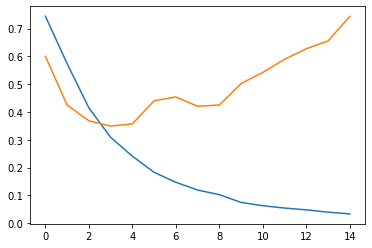

In [411]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [445]:
output = model.predict([x1_test,x2_test])

In [446]:
output = output.flatten()

In [447]:
output = pd.Series(output)
output = pd.concat([testing['Identity'],output], axis=1)

In [449]:
output

,Identity,0
0,5070,0.991150
1,1103,0.003747
2,812,1.000000
3,1632,0.148410
4,1128,0.055700
...,...,...
1736,5648,0.988499
1737,5126,0.000306
1738,1338,0.995238
1739,3885,0.749547


In [450]:
output.to_csv('output.csv')